# Testing HotVis on the tube paths

In [1]:
import csv
from HotVisFunctions import *
from SGDStressFunctions import *
import pandas as pd
import numpy as np

/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
# load tube
tube = pp.PathData.from_ngram("graphs/Tube/tube.ngram")

In [3]:
print(tube.mapping)

Acton Town -> 0
Aldgate -> 1
Aldgate East -> 2
Alperton -> 3
Amersham -> 4
Angel -> 5
Archway -> 6
Arnos Grove -> 7
Arsenal -> 8
Baker Street -> 9
Balham -> 10
Bank / Monument -> 11
Barbican -> 12
Barking -> 13
Barkingside -> 14
Barons Court -> 15
Bayswater -> 16
Becontree -> 17
Belsize Park -> 18
Bermondsey -> 19
Bethnal Green -> 20
Blackfriars -> 21
Blackhorse Road -> 22
Bond Street -> 23
Borough -> 24
Boston Manor -> 25
Bounds Green -> 26
Bow Road -> 27
Brent Cross -> 28
Brixton -> 29
Bromley-by-Bow -> 30
Buckhurst Hill -> 31
Burnt Oak -> 32
Caledonian Road -> 33
Camden Town -> 34
Canada Water -> 35
Canary Wharf -> 36
Canning Town -> 37
Cannon Street -> 38
Canons Park -> 39
Chalfont & Latimer -> 40
Chalk Farm -> 41
Chancery Lane -> 42
Charing Cross -> 43
Chesham -> 44
Chigwell -> 45
Chiswick Park -> 46
Chorleywood -> 47
Clapham Common -> 48
Clapham North -> 49
Clapham South -> 50
Cockfosters -> 51
Colindale -> 52
Colliers Wood -> 53
Covent Garden -> 54
Croxley -> 55
Dagenham East ->

In [4]:
layout_2 = HotVis(tube, 2, 50000, 3, alpha=torch.tensor([1, 0.5]), force=10)
layout_3 =  HotVis(tube, 3, 50000, 3, alpha=torch.tensor([1, 0.5, 0.3]), force=10)
layout_5 =  HotVis(tube, 5, 50000, 3, alpha=torch.tensor([1, 0.5, 0.3, 0.25, 0.2]), force=10)

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(ho_graph.data.edge_index, device=device, dtype=torch.long)
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_sequence = torch.tensor(ho_graph.data.node_sequence, device=device, dtype=torch.long)
100%|██████████| 50000/50000 [00:54<00:00, 909.68it/s]


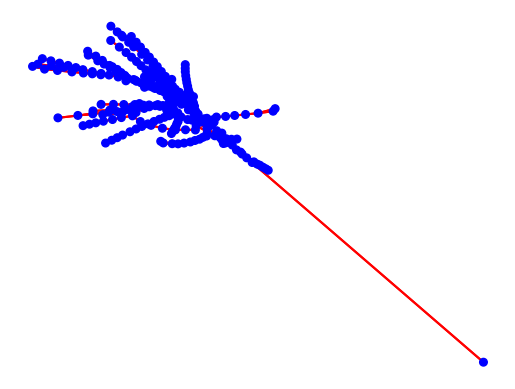

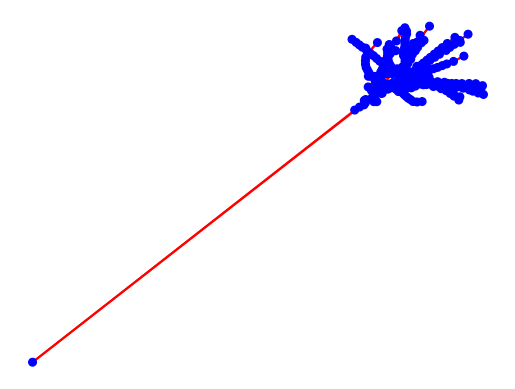

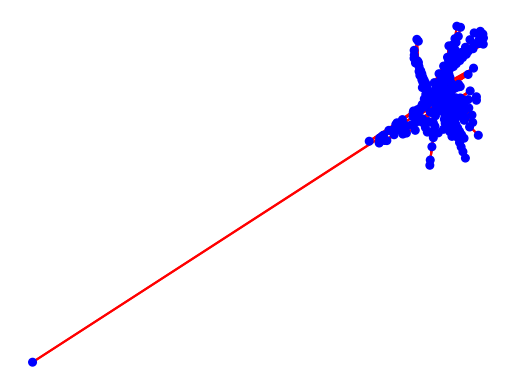

In [5]:
graph = pp.MultiOrderModel.from_PathData(tube, max_order=1).layers[1]
pp.plot(graph, layout=layout_2, backend='matplotlib')
pp.plot(graph, layout=layout_3, backend='matplotlib')
pp.plot(graph, layout=layout_5, backend='matplotlib')

In [6]:
print(edge_crossing(tube, layout_2))
print(edge_crossing(tube, layout_3))
print(edge_crossing(tube, layout_5))

tensor(111.)
tensor(97.)
tensor(222.)


In [7]:
print(causal_path_dispersion(tube, layout_2, 3))
print(causal_path_dispersion(tube, layout_3, 3))
print(causal_path_dispersion(tube, layout_5, 3))

tensor(0.4854, dtype=torch.float64)
tensor(0.4660, dtype=torch.float64)
tensor(0.5403, dtype=torch.float64)


In [8]:
print(closeness_eccentricity(tube, layout_2, 3, 0.1))
print(closeness_eccentricity(tube, layout_3, 3, 0.1))
print(closeness_eccentricity(tube, layout_5, 3, 0.1))

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:215: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path), device=device)


tensor(0.3235, dtype=torch.float64)
tensor(0.3477, dtype=torch.float64)
tensor(0.4008, dtype=torch.float64)
